
## About the dataset:
The wholesale customer data includes the following columns:

- Channel: Distribution channel type (e.g., Horeca or Retail).
- Region: Geographic area (e.g., Lisbon, Oporto, or Other).
- Fresh: Annual spending on fresh products.
- Milk: Annual spending on milk products.
- Grocery: Annual spending on grocery items.
- Frozen: Annual spending on frozen products.
- Detergents_Paper: Annual spending on detergents and paper.
- Delicassen: Annual spending on delicatessen items.

**Description**: The dataset represents annual spending across different categories for wholesale customers segmented by region and channel.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('./Datasets/Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [8]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [9]:
#Correlation matrix

corr_matrix = df.corr()
corr_matrix

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


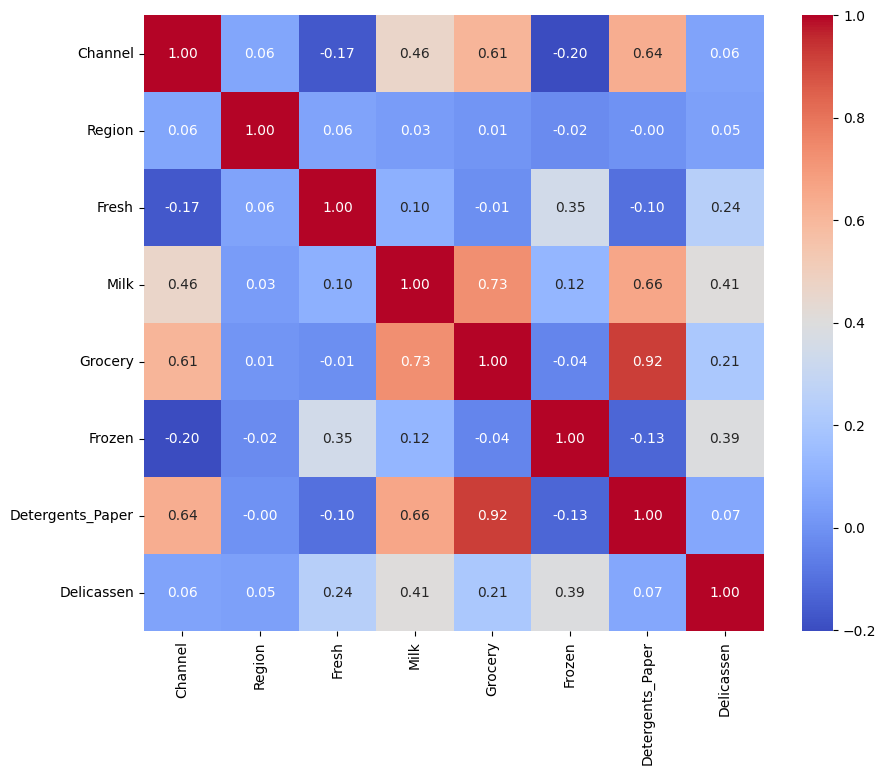

In [10]:
#Heatmap

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm', fmt='.2f', annot = True)
plt.show()


Correlation values indicate the **strength** and **direction** of the linear relationship between pairs of variables. Correlation coefficients range from **-1 to 1**:

-   **+1** indicates a perfect positive linear relationship (both variables move in the same direction).
-   **-1** indicates a perfect negative linear relationship (as one variable increases, the other decreases).
-   **0** indicates no linear relationship.

Let’s go through the main inferences you can draw from this correlation matrix:

### 1. **Correlations Involving `Channel`:**

-   **Channel and Milk** have a moderate **positive correlation** of **0.46**, suggesting that as one increases, the other tends to increase as well. This indicates that stores in certain channels may sell more milk.
-   **Channel and Frozen** have a **negative correlation** of **-0.20**, implying that as one increases, the other decreases slightly.
-   **Channel and Detergents_Paper** show a relatively **strong positive correlation** of **0.64**, which suggests that stores in a particular channel might have higher sales of detergents and paper products.

### 2. **Correlations Involving `Region`:**

-   **Region and the rest of the variables** show very weak correlations (ranging from **-0.02 to 0.07**). This suggests that **Region** does not have a strong linear relationship with the sales of products such as Fresh, Milk, Grocery, Frozen, Detergents_Paper, and Delicassen in this dataset.

### 3. **Product Categories (Fresh, Milk, Grocery, Frozen, Detergents_Paper, and Delicassen):**

-   **Milk and Grocery** have a **strong positive correlation** of **0.73**, indicating that stores with higher milk sales are likely to have higher grocery sales as well.
-   **Milk and Detergents_Paper** also show a **moderate positive correlation** of **0.66**, suggesting that milk sales and detergents/paper sales are somewhat related.
-   **Grocery and Detergents_Paper** have an **even stronger positive correlation** of **0.92**, suggesting that stores that sell more groceries also tend to sell more detergents and paper products.
-   **Fresh and Frozen** have a **moderate positive correlation** of **0.35**, indicating that stores that sell more fresh products tend to sell more frozen products as well, though the relationship is not as strong as some other variables.
-   **Fresh and Delicassen** have a **moderate positive correlation** of **0.24**, meaning that stores that sell fresh products tend to sell delicatessen products, though the relationship is weaker than others.

### 4. **Other Notable Correlations:**

-   **Frozen and Detergents_Paper** show a **weak negative correlation** of **-0.13**, which means there is a slight inverse relationship between the sales of frozen goods and detergents/paper. However, this is a very weak correlation, suggesting that it is not a significant factor.
-   **Delicassen and other product categories** show relatively weak correlations, with the highest being **0.41** between Delicassen and Frozen, and the lowest being **0.05** between Delicassen and Channel. This indicates that delicatessen sales are not as strongly correlated with other product categories in the dataset.

### **Key Inferences:**

1.  **Milk and Grocery Sales are Strongly Correlated:**
    
    -   There is a strong positive correlation between **Milk** and **Grocery** (0.73), suggesting that stores that sell a lot of milk also sell a lot of grocery items. This could indicate that these two products are often purchased together.
2.  **Grocery and Detergents/Paper:**
    
    -   The **strong positive correlation** between **Grocery** and **Detergents_Paper** (0.92) suggests that these products are likely bought together, meaning stores with higher grocery sales may also sell more cleaning and paper products.
3.  **Weak Correlations with Region:**
    
    -   **Region** does not appear to have a significant impact on the sales of most product categories in this dataset, as the correlation values with all product categories are very low.
4.  **Test Preparation Courses and Product Categories:**
    
    -   Although **Channel** has some moderate correlations with product categories (e.g., **Milk**, **Frozen**, **Detergents_Paper**), the **Region** variable has little to no correlation with the other variables, suggesting that region might not be a good predictor of product sales in this dataset.
5.  **Detergents/Paper and Milk:**
    
    -   **Milk** and **Detergents/Paper** are moderately positively correlated (0.66), which may imply that stores with higher sales of milk may also stock and sell more detergents and paper products, possibly due to customer behavior or store types.

### **Possible Actions:**

-   **Market Basket Analysis:**
    
    -   If you are interested in improving sales or running promotions, you might want to explore **associations** between **Grocery**, **Milk**, and **Detergents/Paper** as they seem to be closely linked. Combining these products in promotional strategies could boost sales.
-   **Targeted Sales Strategies for Specific Channels:**
    
    -   Stores in specific **channels** could target product categories that are more likely to be associated, such as **Frozen** and **Fresh** products or **Detergents/Paper** with **Grocery** and **Milk**.
-   **Explore the Role of Region:**
    
    -   Since **Region** has weak correlations with product categories, it may not be a good variable for segmentation in this context. However, further analysis such as **cluster analysis** or looking at **non-linear relationships** could provide additional insights.

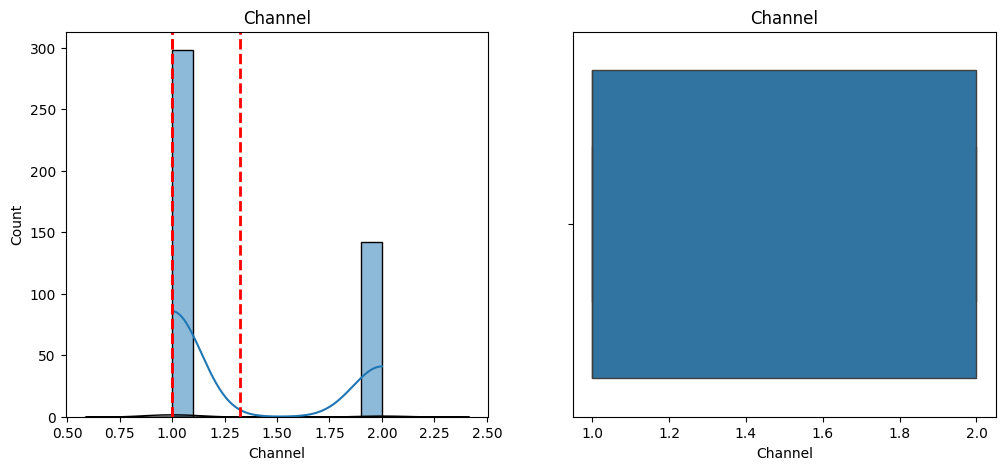

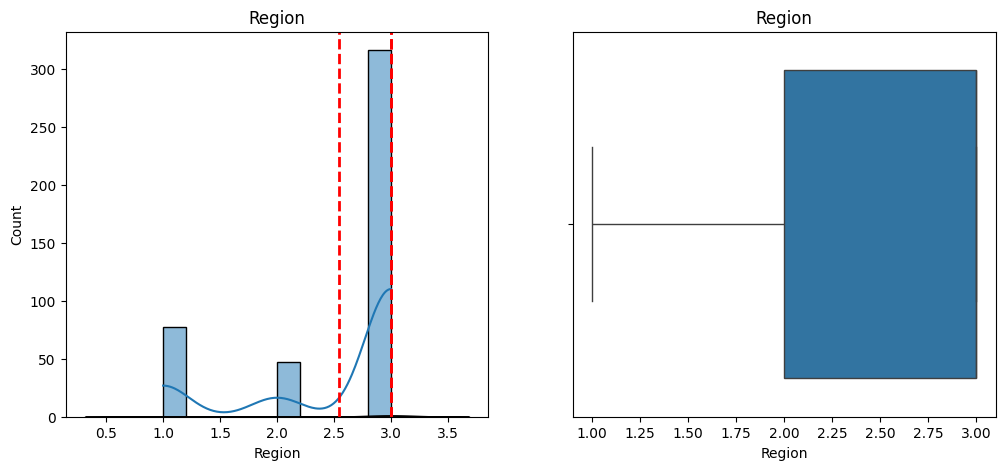

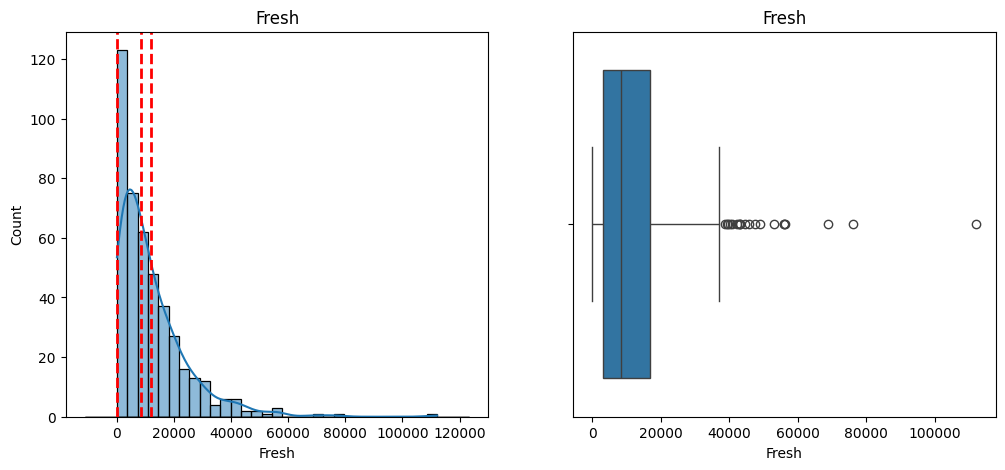

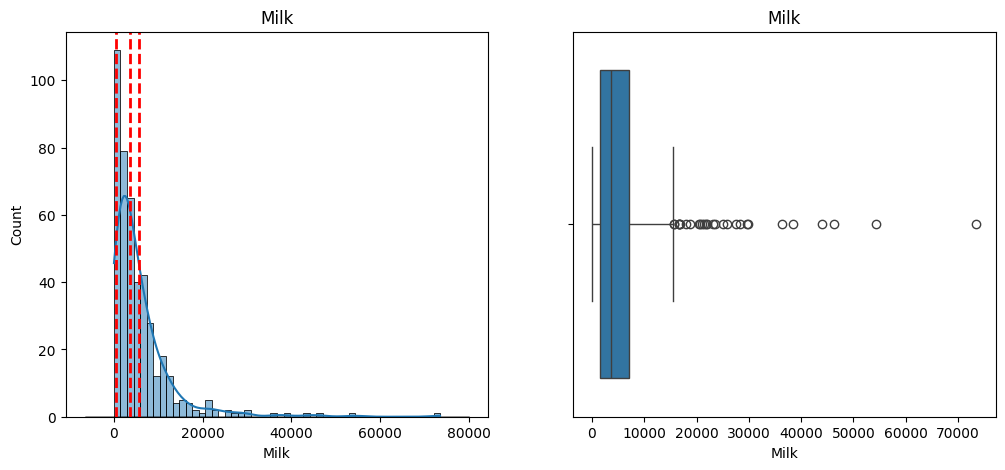

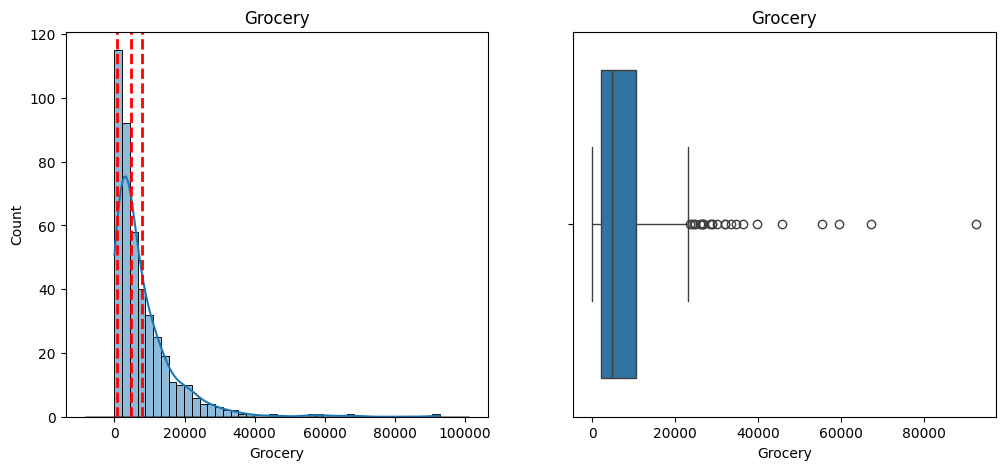

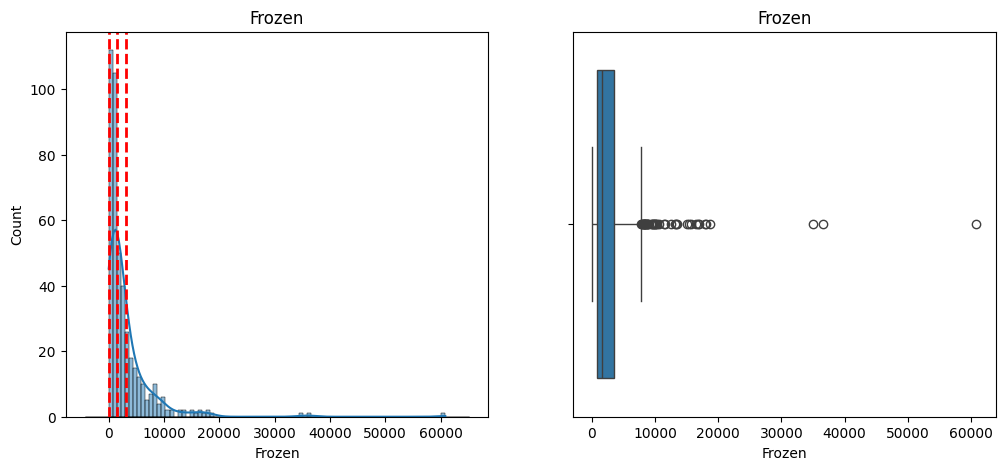

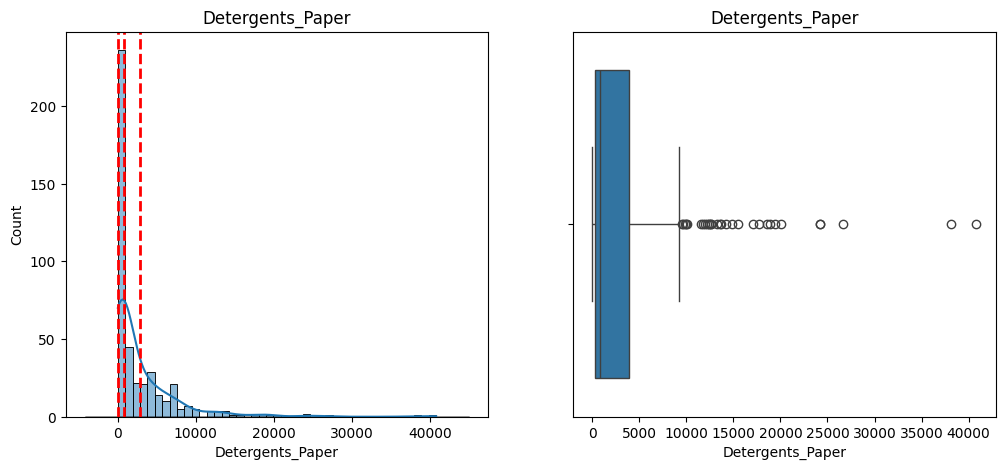

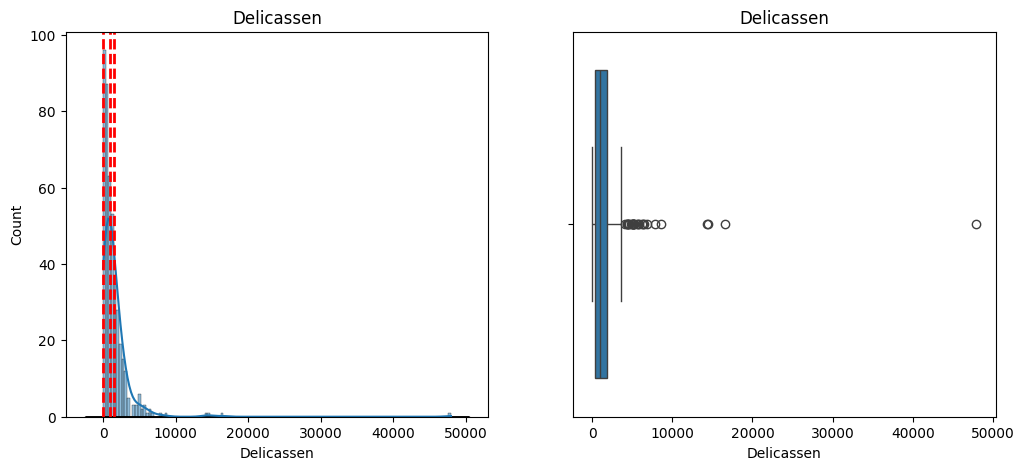

In [18]:
def plot_distributions(df=df):
    for col in df.columns:
        plt.figure(figsize=(12,5))
        
        plt.subplot(1,2,1)
        sns.histplot(kde=True, data = df[col])

        mean = df[col].mean()
        mode = df[col].mode()[0]
        median = df[col].median()

        sns.kdeplot(df[col], fill=True, color='black')
        
        plt.axvline(mean, color='red', linestyle='--', linewidth = 2, label='Mean')
        plt.axvline(median, color='red', linestyle='--', linewidth = 2, label='Median')
        plt.axvline(mode, color='red', linestyle='--', linewidth = 2, label='Mode')

        plt.title(col)

        plt.subplot(1,2,2)
        sns.boxplot(x = df[col])
        plt.title(col)


        plt.show

plot_distributions()


In [19]:
def remove_outliers():
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        IQR = Q3 - Q1

        u = Q3 + 1.5 * IQR 
        l  = Q1 - 1.5 * IQR

        df[col] = np.clip(df[col], u,l)
    return df

df = remove_outliers()

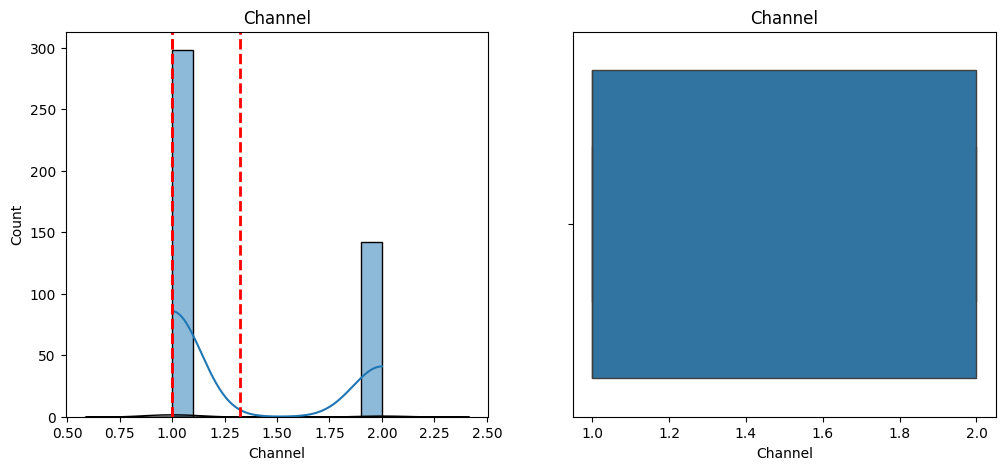

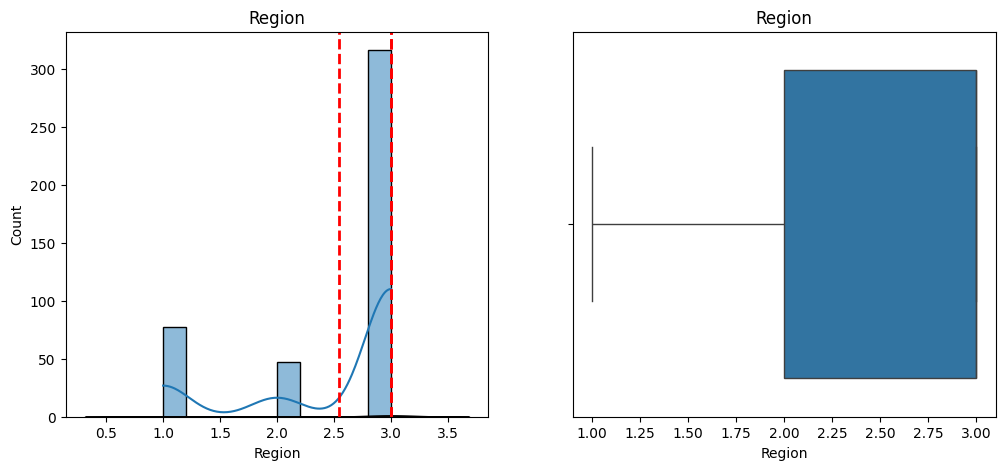

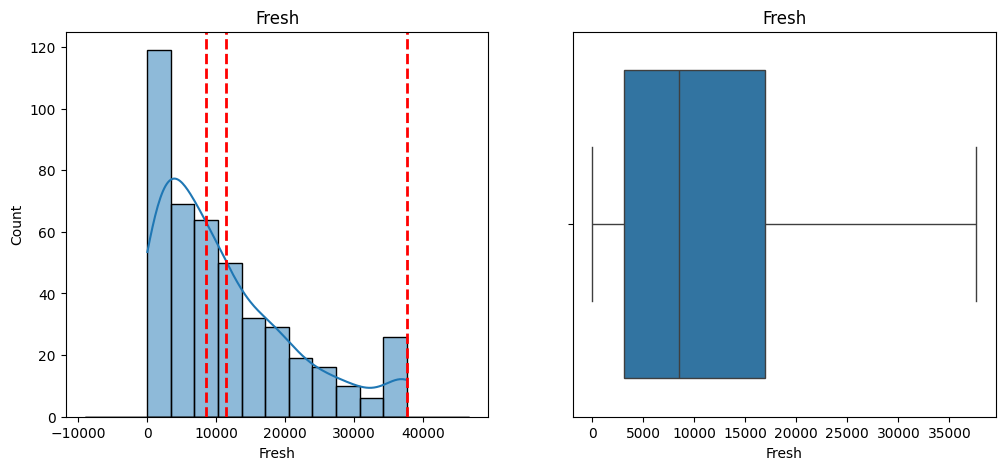

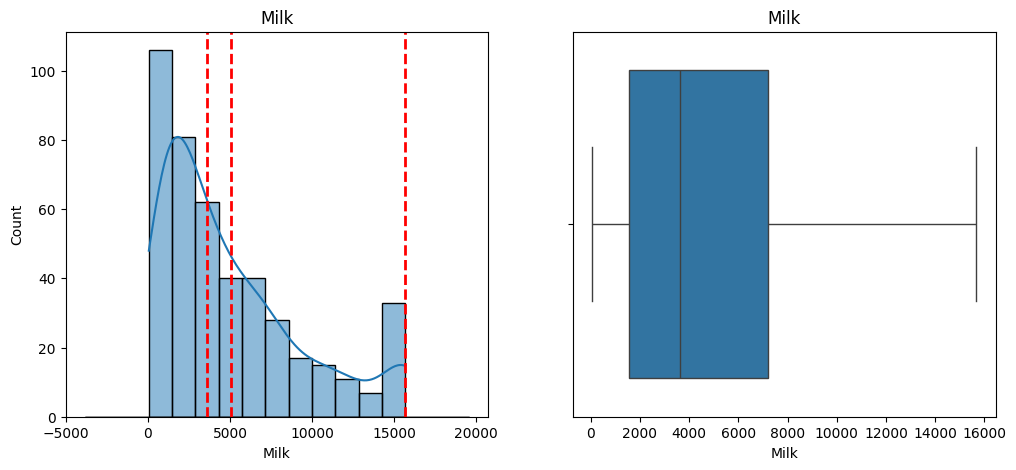

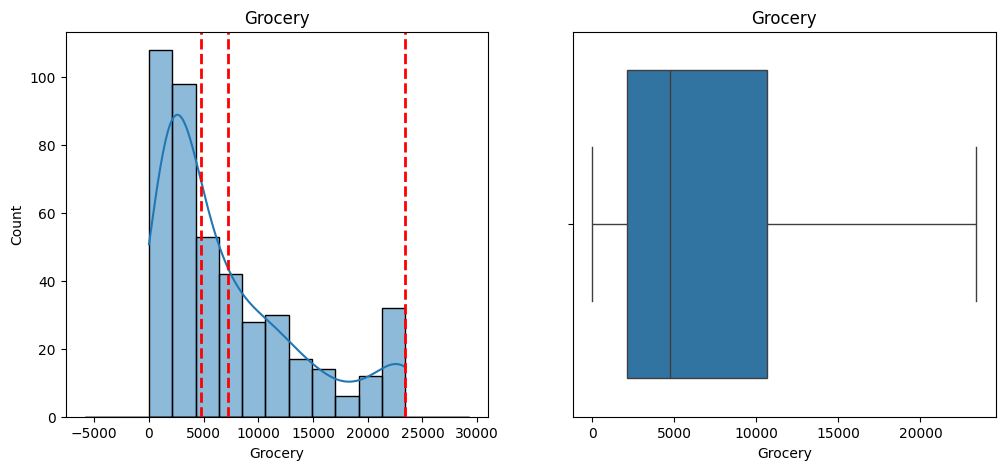

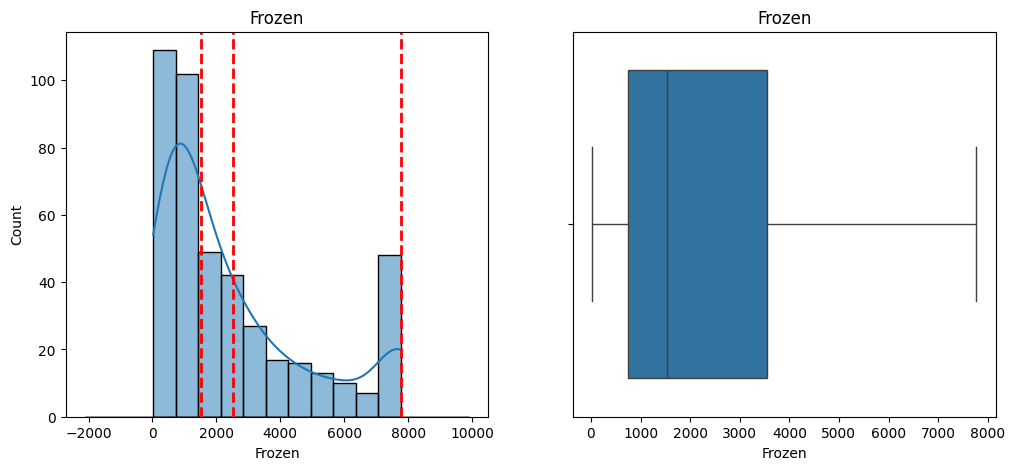

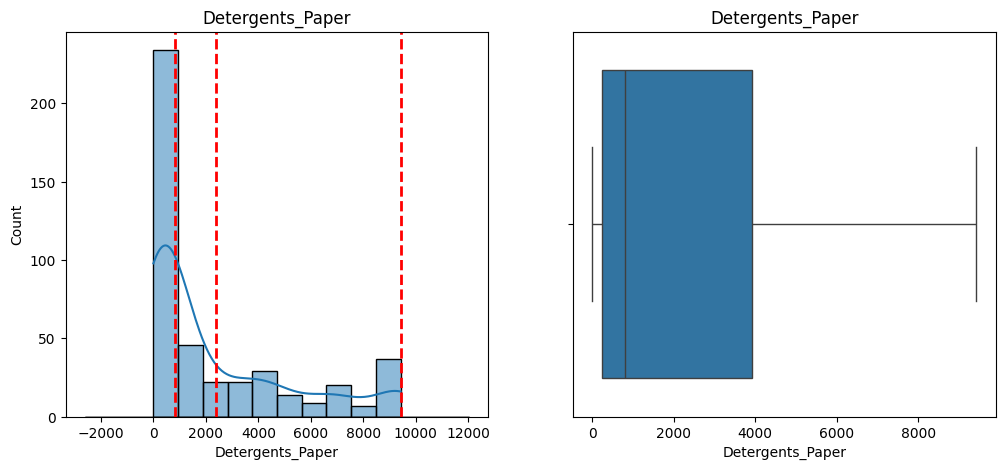

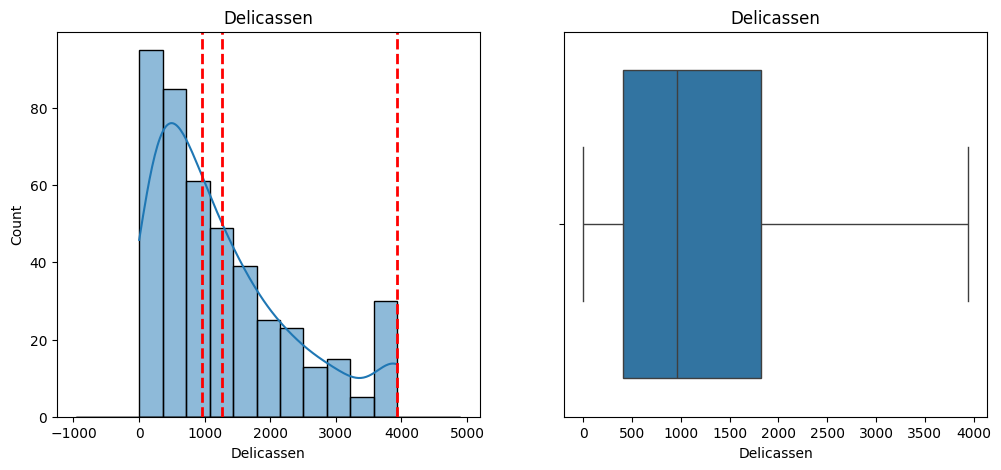

In [20]:
plot_distributions(df)

# Normalization

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_data = scaler.fit_transform(df)
df_norm = pd.DataFrame(std_data, columns=df.columns)
df_norm.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.128573,1.051586,0.049267,-0.953244,0.095792,0.065892
1,1.448652,0.590668,-0.421627,1.086735,0.353865,-0.309735,0.306519,0.470759
2,1.448652,0.590668,-0.490647,0.858040,0.067935,-0.042437,0.382435,2.469440
3,-0.690297,0.590668,0.187004,-0.879308,-0.457635,1.619962,-0.641923,0.481851
4,1.448652,0.590668,1.103677,0.082487,-0.005824,0.585275,-0.209575,2.469440


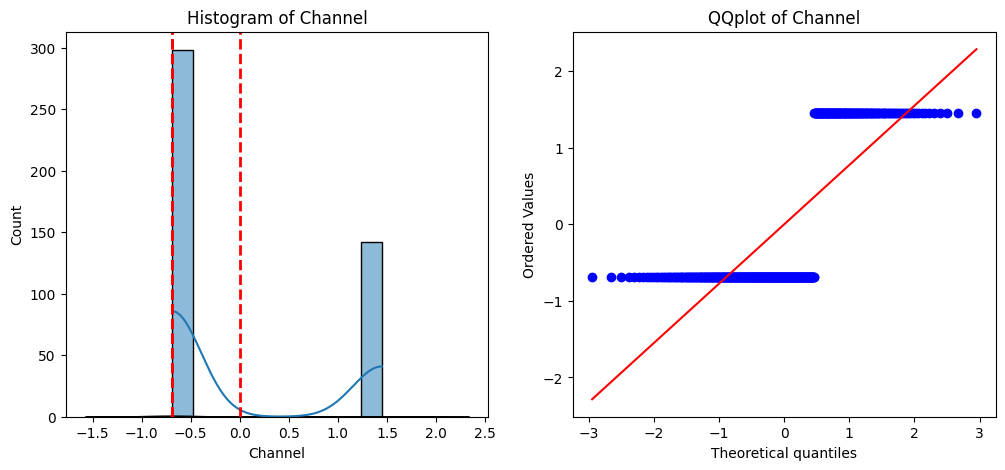

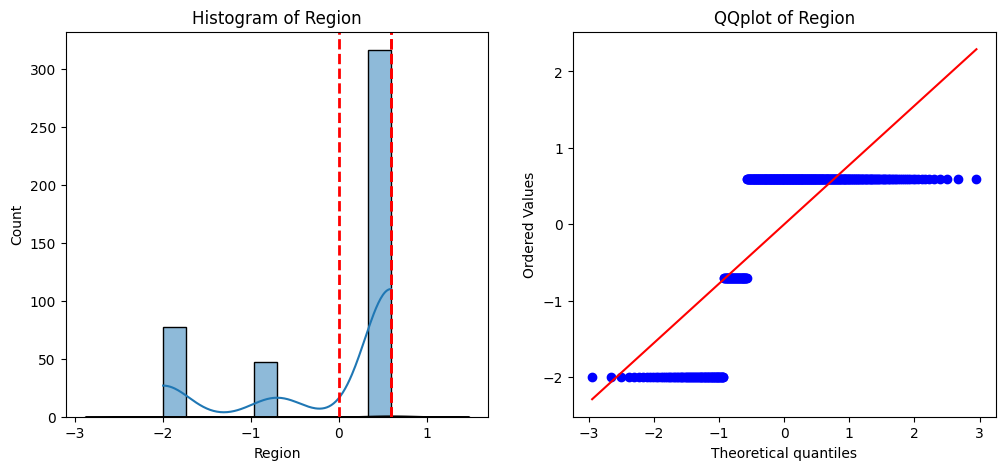

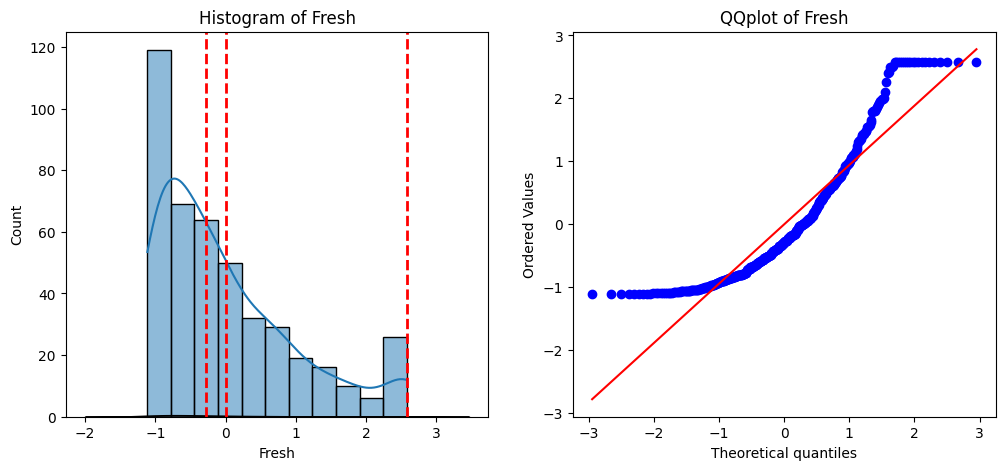

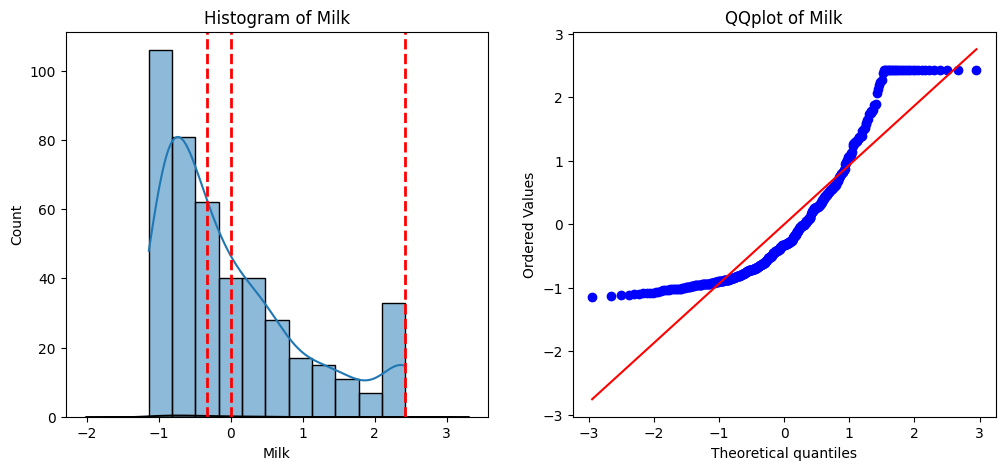

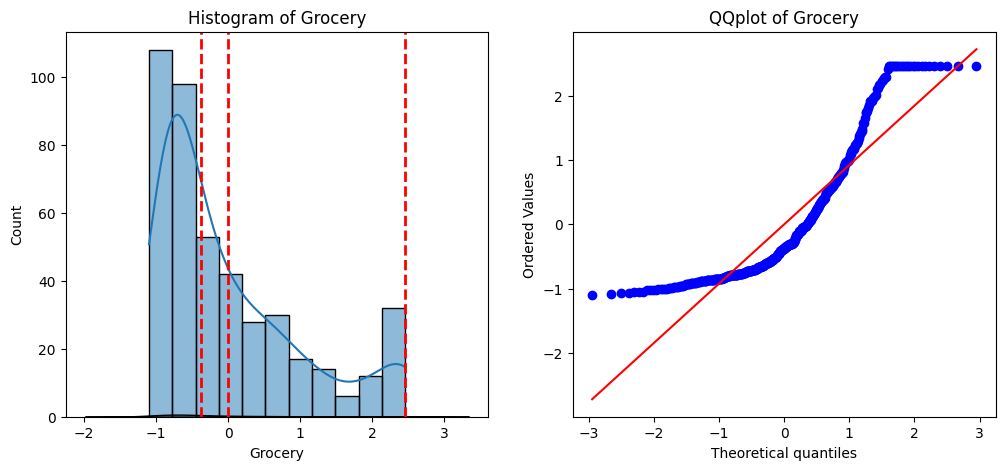

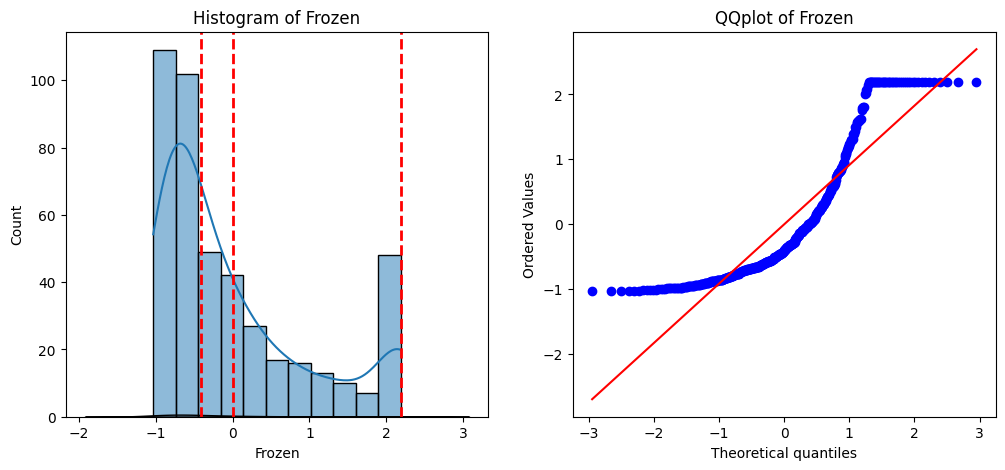

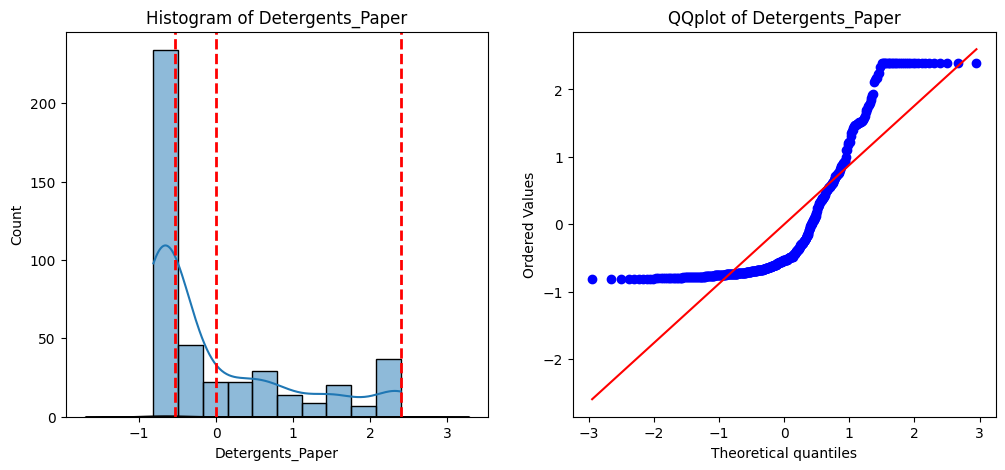

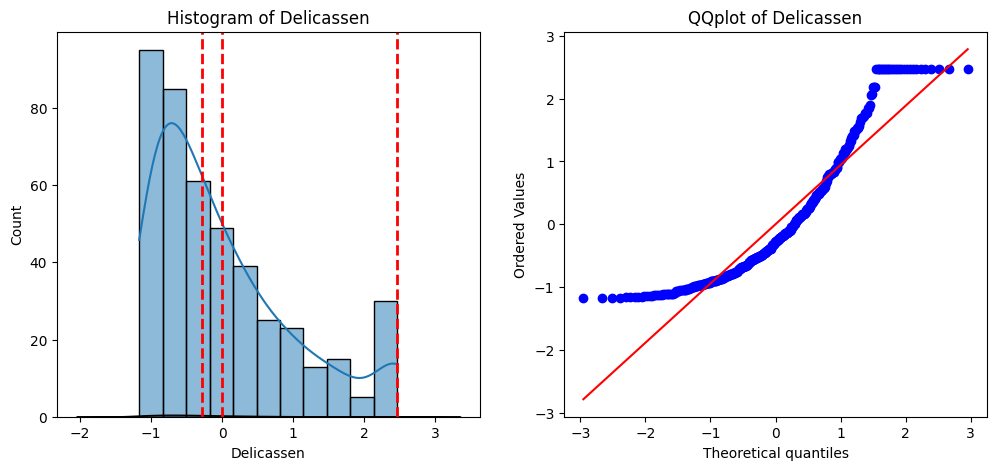

In [25]:
import scipy.stats as stat

def graphical_norm_test(df=df):
    for col in df.columns:
        plt.figure(figsize=(12,5))
        
        plt.subplot(1,2,1)
        sns.histplot(kde=True, data = df[col])
        sns.kdeplot(df[col], fill=True, color='black')
        

        mean = df[col].mean()
        mode = df[col].mode()[0]
        median = df[col].median()

        
        plt.axvline(mean, color='red', linestyle='--', linewidth = 2, label='Mean')
        plt.axvline(median, color='red', linestyle='--', linewidth = 2, label='Median')
        plt.axvline(mode, color='red', linestyle='--', linewidth = 2, label='Mode')

        plt.title(f"Histogram of {col}")

        plt.subplot(1,2,2)
        stat.probplot(df[col], dist="norm", plot=plt)
        plt.title(f"QQplot of {col}")


        plt.show()

graphical_norm_test(df_norm)
    

In [31]:
from scipy.stats import kstest, shapiro

def analytical_norm_test(df=df):
    for col in df.columns:
        print(f"Normality test results for {col}:")

        #shapiro_test
        shapiro_test = shapiro(df_norm[col])
        print(f"Shapiro-Wilk test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

        #kstest
        ks_test = kstest(df_norm[col], 'norm')
        print(f"Kolmogorov-Smirnov test: Statistic={ks_test.statistic}, p-value={ks_test.pvalue}")

        print()


analytical_norm_test(df_norm)

Normality test results for Channel:
Shapiro-Wilk test: Statistic=0.5891142494085351, p-value=6.23848642358508e-31
Kolmogorov-Smirnov test: Statistic=0.43226903730621935, p-value=3.0885760065348317e-75

Normality test results for Region:
Shapiro-Wilk test: Statistic=0.5925984086436475, p-value=7.89652477362549e-31
Kolmogorov-Smirnov test: Statistic=0.44081046729644874, p-value=2.250376950786869e-78

Normality test results for Fresh:
Shapiro-Wilk test: Statistic=0.874536451678393, p-value=2.1676348131475912e-18
Kolmogorov-Smirnov test: Statistic=0.13281118051866658, p-value=3.1473949006050354e-07

Normality test results for Milk:
Shapiro-Wilk test: Statistic=0.8576601098411621, p-value=1.4659023901020638e-19
Kolmogorov-Smirnov test: Statistic=0.14766853815735792, p-value=7.719620151017953e-09

Normality test results for Grocery:
Shapiro-Wilk test: Statistic=0.8363347260108167, p-value=6.70635878551824e-21
Kolmogorov-Smirnov test: Statistic=0.16943678742107882, p-value=1.6374536864315114e

### Transformation

In [35]:
from scipy.stats import boxcox

df['gr_log'] = np.log1p(df['Grocery'])

def feature_scale():
    scaler = StandardScaler()
    # data = df.to_numpy()
    normalized_data = scaler.fit_transform(df)
    df_norm = pd.DataFrame(normalized_data, columns = df.columns)
    return df_norm

df_norm = feature_scale()
df_norm.head()

# graphical_norm_test(df_norm)
analytical_norm_test(df_norm)

Normality test results for Channel:
Shapiro-Wilk test: Statistic=0.5891142494085351, p-value=6.23848642358508e-31
Kolmogorov-Smirnov test: Statistic=0.43226903730621935, p-value=3.0885760065348317e-75

Normality test results for Region:
Shapiro-Wilk test: Statistic=0.5925984086436475, p-value=7.89652477362549e-31
Kolmogorov-Smirnov test: Statistic=0.44081046729644874, p-value=2.250376950786869e-78

Normality test results for Fresh:
Shapiro-Wilk test: Statistic=0.874536451678393, p-value=2.1676348131475912e-18
Kolmogorov-Smirnov test: Statistic=0.13281118051866658, p-value=3.1473949006050354e-07

Normality test results for Milk:
Shapiro-Wilk test: Statistic=0.8576601098411621, p-value=1.4659023901020638e-19
Kolmogorov-Smirnov test: Statistic=0.14766853815735792, p-value=7.719620151017953e-09

Normality test results for Grocery:
Shapiro-Wilk test: Statistic=0.8363347260108167, p-value=6.70635878551824e-21
Kolmogorov-Smirnov test: Statistic=0.16943678742107882, p-value=1.6374536864315114e

# Linear regression

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [45]:
X = df.drop(columns = ['Milk'])
y = df['Milk']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

X_train.shape

(352, 8)

In [46]:
model = LinearRegression()

model.fit(X_train, y_train)

for col, coeff in zip(df.columns, model.coef_):
    print (f"{col} : {coeff:.2f}")
print (model.intercept_)

y_pred = model.predict(X_test)

model.score(X_test, y_test)

Channel : 592.53
Region : -46.19
Fresh : 0.00
Milk : 0.37
Grocery : 0.04
Frozen : 0.13
Detergents_Paper : 0.62
Delicassen : 218.83
-1430.2169898945922


0.6546404057955135

In [47]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

MSE: 6829236.36
RMSE: 2613.28
MAE: 1695.28
R-squared: 0.65


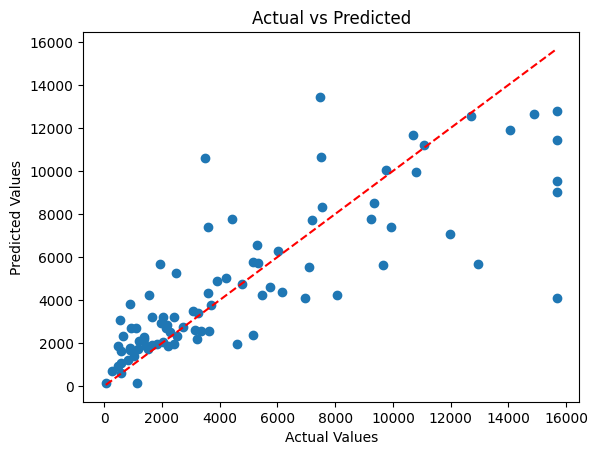

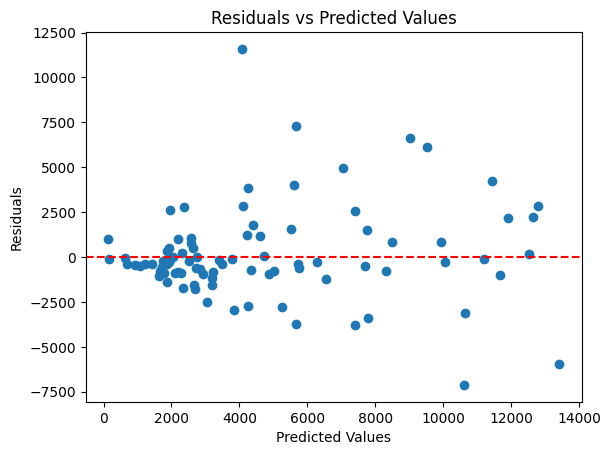

In [48]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'r--')#red)
plt.show()
print()

# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values');
plt.show()

# Z Test

In [54]:
from statsmodels.stats.weightstats import ztest

# Assuming 'Region' has two categories, e.g., 'Region_1' and 'Region_2', and 'Milk' is the variable
group1 = df[df['Region'] == 1]['Milk']
group2 = df[df['Region'] == 2]['Milk']

z, p = ztest(group1, group2)
# Print the results
print(f"Z-statistic: {z}")
print(f"P-value: {p}")

if p < 0.05:
    print("Reject the null hypothesis: The means of the two groups are significantly different.")
else:
    print("Fail to reject the null hypothesis: The means of the two groups are not significantly different.")



Z-statistic: 0.3736697924954629
P-value: 0.7086500020190608
Fail to reject the null hypothesis: The means of the two groups are not significantly different.


In [55]:
from scipy.stats import ttest_ind

# Assuming 'Region' has two categories, e.g., 'Region_1' and 'Region_2', and 'Milk' is the variable
group1 = df[df['Region'] == 1]['Milk']
group2 = df[df['Region'] == 2]['Milk']

t_stat, p_value = ttest_ind(group1, group2)

# Print the results
print(f"t-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: The means of the two groups are significantly different.")
else:
    print("Fail to reject the null hypothesis: The means of the two groups are not significantly different.")


t-statistic: 0.3736697924954629
P-value: 0.7092985607608044
Fail to reject the null hypothesis: The means of the two groups are not significantly different.


In [60]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

anova1 = ols('Milk ~ C(Region)', data = df).fit()
anova_table = sm.stats.anova_lm(anova1, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Region),4.420150e+06,2.0,0.114404,0.891925
Residual,8.442073e+09,437.0,NaN,NaN


In [61]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

anova1 = ols('Milk ~ C(Region)  + C(Channel) + C(Region):C(Channel)', data = df).fit()
anova_table = sm.stats.anova_lm(anova1, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Region),4.859340e+07,2.0,1.964908,1.414137e-01
C(Channel),3.070902e+09,1.0,248.348150,1.434363e-44
C(Region):C(Channel),4.626164e+06,2.0,0.187062,8.294590e-01
Residual,5.366545e+09,434.0,NaN,NaN
